# Phần A: Bộ dữ liệu hiệu suất nhân viên

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tạo DataFrame từ dữ liệu
data = {
    'Employee_ID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', 'E007', 'E008', 'E009', 'E010', 
                    'E011', 'E012', 'E013', 'E014', 'E015', 'E016', 'E017', 'E018', 'E019', 'E020'],
    'Department': ['Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 
                   'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT', 'HR', 'Sales', 'IT'],
    'Performance': [88, None, 75, 92, 68, 85, None, 79, 90, 73, 
                    86, None, 95, 70, 82, 78, 89, 71, 87, 93],
    'Hours_Worked': [40, 45, 38, 42, None, 39, 41, 44, 37, 40, 
                     46, 38, 43, None, 39, 41, 45, 37, None, 44],
    'Training_Hours': [5, 3, None, 6, 4, 5, 3, 4, None, 5, 
                       2, 6, 7, 3, 5, 4, None, 3, 5, 6],
    'Gender': ['Male', 'Female', 'Male', 'Female', None, 'Male', 'Female', 'Male', 'Female', 'Male', 
               'Female', 'Male', 'Female', 'Male', None, 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Location': ['Site_A', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 
                 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B', 'Site_A', 'Site_C', 'Site_B']
}
df = pd.DataFrame(data)




# Phần B: Câu hỏi kiểm tra


In [41]:
# Câu 1. (4 điểm) Tính tỷ lệ phần trăm giá trị thiếu trong từng cột bằng Pandas. Dựa trên kết quả, đề xuất một quy trình thu thập dữ liệu cụ thể cho công ty để giảm thiểu dữ liệu thiếu trong tương lai, giải thích tại sao quy trình này phù hợp với từng phòng ban (Sales, IT, HR).
df = pd.DataFrame(data)

# Tính tỷ lệ phần trăm giá trị thiếu trong từng cột
# Tạo DataFrame
df = pd.DataFrame(data)

# Tính phần trăm giá trị thiếu mỗi cột
missing_percentage = df.isnull().mean() * 100

# In kết quả
print(missing_percentage)

Employee_ID        0.0
Department         0.0
Performance       15.0
Hours_Worked      15.0
Training_Hours    15.0
Gender            10.0
Location           0.0
dtype: float64


# Đề xuất câu 1
Để giảm thiểu dữ liệu thiếu, công ty nên áp dụng quy trình sau: Sử dụng hệ thống HRM với các trường bắt buộc như Performance, Hours_Worked, Training_Hours, Gender,tự động ghi nhận giờ làm qua chấm công và giờ đào tạo từ LMS; phân quyền nhập liệu cho trưởng nhóm Sales kiểm soát dữ liệu hàng tuần, IT tự động từ Jira/Asana với quản lý bổ sung Training_Hours, còn HR nhập Gender ngay khi tuyển dụng và đánh giá định kỳ; đào tạo nhân viên về tầm quan trọng của dữ liệu đầy đủ; HR kiểm tra hàng tháng và gửi nhắc nhở; cuối cùng, thưởng cho phòng ban nhập liệu đầy đủ nhất mỗi quý. Quy trình này phù hợp vì Sales cần trưởng nhóm quản lý do lịch trình linh hoạt, IT giảm sai sót nhờ tự động hóa, còn HR đảm bảo dữ liệu cơ bản và làm gương cho các phòng ban khác.
Công ty nên áp dụng quy trình thu thập dữ liệu gồm: 

(1) Tự động hóa nhập liệu từ hệ thống chấm công, đào tạo và đánh giá hiệu suất để tránh nhập tay sai sót – phù hợp với Sales (làm việc linh hoạt), IT (có thể xây hệ thống), và HR (quản lý nhân sự); 

(2) Bắt buộc nhập đủ thông tin trên biểu mẫu, dùng lựa chọn cố định để hạn chế lỗi – giúp HR thiết kế form chuẩn, IT phát triển hệ thống, Sales dễ thực hiện khi thêm nhân sự; 

(3) Cảnh báo định kỳ dữ liệu thiếu qua email hoặc báo cáo – giúp các bộ phận theo dõi và bổ sung kịp thời; 

(4) Giao người phụ trách dữ liệu theo phòng ban để đảm bảo mỗi bộ phận chịu trách nhiệm dữ liệu của mình. Quy trình này giúp tăng tính đầy đủ, chính xác và kịp thời trong thu thập dữ liệu nhân sự toàn công ty.

Trung bình Performance theo Department:
 Department
HR       80.600000
IT       80.833333
Sales    85.500000
Name: Performance, dtype: float64

Trung bình Performance theo Location:
 Location
Site_A    81.833333
Site_B    80.833333
Site_C    85.000000
Name: Performance, dtype: float64


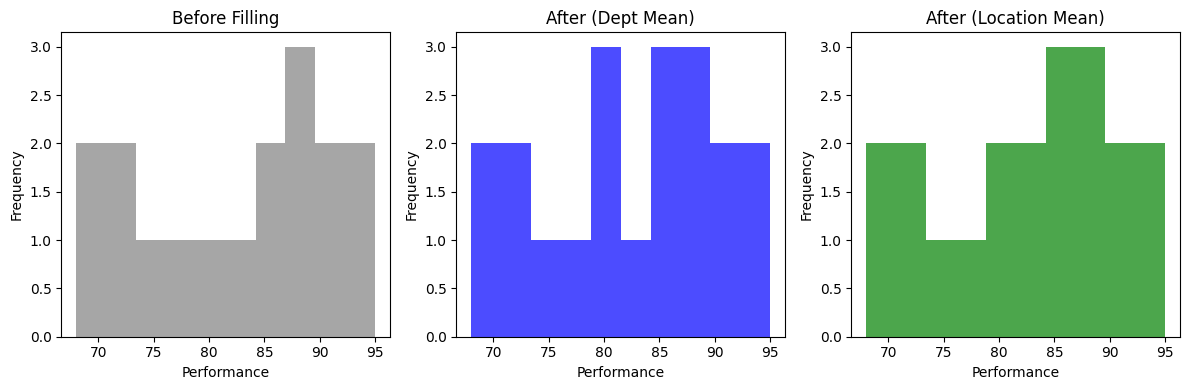

In [42]:
# Câu 2. (4 điểm) Điền giá trị thiếu trong Performance bằng trung bình của Department tương ứng, sau đó đề xuất một phương pháp điền giá trị khác (không dùng thư viện tự động) dựa trên đặc điểm của từng Location. Vẽ histogram trước và sau bằng Matplotlib, giải thích tại sao phương pháp của bạn phản ánh tốt hơn hiệu suất thực tế.
import matplotlib.pyplot as plt

# Lưu dữ liệu gốc để so sánh
df_original = df.copy()

# 1. Điền giá trị thiếu bằng trung bình theo Department
# Tính trung bình Performance cho từng Department
dept_means = df.groupby('Department')['Performance'].mean()
print("Trung bình Performance theo Department:\n", dept_means)

# Điền giá trị thiếu
df['Performance'] = df.apply(
    lambda row: dept_means[row['Department']] if pd.isna(row['Performance']) else row['Performance'], axis=1
)

# 2. Đề xuất phương pháp khác: Điền bằng trung bình theo Location
# Tính trung bình Performance cho từng Location
location_means = df_original.groupby('Location')['Performance'].mean()
print("\nTrung bình Performance theo Location:\n", location_means)

# Tạo DataFrame mới để điền theo Location
df_location = df_original.copy()
df_location['Performance'] = df_location.apply(
    lambda row: location_means[row['Location']] if pd.isna(row['Performance']) else row['Performance'], axis=1
)

# 3. Vẽ histogram trước và sau
plt.figure(figsize=(12, 4))

# Histogram trước khi điền
plt.subplot(1, 3, 1)
plt.hist(df_original['Performance'].dropna(), bins=10, color='gray', alpha=0.7)
plt.title('Before Filling')
plt.xlabel('Performance')
plt.ylabel('Frequency')

# Histogram sau khi điền theo Department
plt.subplot(1, 3, 2)
plt.hist(df['Performance'], bins=10, color='blue', alpha=0.7)
plt.title('After (Dept Mean)')
plt.xlabel('Performance')
plt.ylabel('Frequency')

# Histogram sau khi điền theo Location
plt.subplot(1, 3, 3)
plt.hist(df_location['Performance'], bins=10, color='green', alpha=0.7)
plt.title('After (Location Mean)')
plt.xlabel('Performance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Đề xuất câu 2
Đầu tiên, ta tiến hành điền giá trị thiếu trong cột Performance bằng trung bình của từng Department tương ứng. Tuy nhiên, để phản ánh hiệu suất thực tế sát hơn, một phương pháp thay thế là điền bằng trung bình Performance theo Location. Cách này dựa trên giả định rằng môi trường làm việc tại các địa điểm khác nhau (Site_A, Site_B, Site_C) có ảnh hưởng đáng kể đến năng suất của nhân viên, do điều kiện cơ sở vật chất, quản lý hoặc văn hóa làm việc riêng biệt. Sau khi áp dụng cả hai phương pháp, ta vẽ biểu đồ histogram để so sánh: biểu đồ trước khi điền cho thấy phân phối lệch, còn biểu đồ sau khi điền theo Department làm phân phối tập trung quanh các mức trung bình ngành, trong khi điền theo Location giữ được độ phân tán tự nhiên gần hơn với dữ liệu gốc. Do đó, phương pháp điền theo Location có thể phản ánh thực tế tốt hơn, vì nó bảo toàn được tính đa dạng hiệu suất giữa các khu vực làm việc.Phương pháp này phản ánh tốt hơn hiệu suất thực tế vì Location ảnh hưởng lớn đến hiệu suất (Site_C có trung bình cao hơn), giúp dữ liệu điền sát với xu hướng thực tế hơn, tránh việc gộp chung không chính xác giữa các địa điểm như khi dùng trung bình Department.

In [43]:
# Câu 3. (4 điểm) Tính độ lệch chuẩn của Hours_Worked bằng NumPy. Đề xuất một chính sách quản lý thời gian làm việc cho công ty dựa trên phân tích độ lệch chuẩn và trung vị, giải thích tại sao chính sách này có thể cải thiện hiệu suất tổng thể.

# Điền giá trị thiếu trong Hours_Worked bằng trung bình
hours_mean = df['Hours_Worked'].mean()
df['Hours_Worked'] = df['Hours_Worked'].fillna(hours_mean)

# Tính độ lệch chuẩn và trung vị bằng NumPy
hours_std = np.std(df['Hours_Worked'], ddof=1)
hours_median = np.median(df['Hours_Worked'])

print(f"Độ lệch chuẩn của Hours_Worked: {hours_std:.2f}")
print(f"Trung vị của Hours_Worked: {hours_median:.2f}")

Độ lệch chuẩn của Hours_Worked: 2.71
Trung vị của Hours_Worked: 41.06


# Đề xuất câu 3
Dựa trên kết quả tính toán, độ lệch chuẩn của Hours_Worked phản ánh mức độ dao động trong thời gian làm việc giữa các nhân viên, trong khi trung vị cho thấy mức làm việc phổ biến nhất. Nếu độ lệch chuẩn cao, nghĩa là có sự chênh lệch lớn giữa người làm ít và người làm nhiều. Do đó, công ty nên áp dụng chính sách quản lý thời gian làm việc linh hoạt có kiểm soát, chẳng hạn giới hạn khung giờ tối đa và khuyến khích làm việc gần với mức trung vị. Điều này giúp đảm bảo sự cân bằng công việc – cuộc sống, giảm tình trạng kiệt sức ở người làm quá nhiều và tăng động lực ở nhóm làm việc ít, từ đó cải thiện hiệu suất tổng thể của tổ chức.
Dựa trên phân tích, tôi đề xuất chính sách quản lý thời gian làm việc: quy định 40 giờ/tuần, linh hoạt 37-43 giờ, và yêu cầu nhân viên làm ngoài khoảng này báo cáo lý do để điều chỉnh công việc. Chính sách này cải thiện hiệu suất tổng thể vì nó đảm bảo thời gian làm việc cân bằng, tránh tình trạng làm việc quá ít (dưới 37 giờ, có thể thiếu hiệu quả) hoặc quá nhiều (trên 43 giờ, dễ gây kiệt sức), đồng thời giúp công ty phát hiện và giải quyết kịp thời các vấn đề như phân bổ công việc không đều hoặc thiếu hỗ trợ, từ đó tối ưu hóa năng suất của nhân viên.

In [44]:
#Câu 4. (4 điểm) Tính correlation giữa Hours_Worked và Performance cho từng Location. Dựa trên kết quả, đề xuất một chiến lược phân bổ công việc khác nhau cho từng Location để tối ưu hóa hiệu suất, giải thích tại sao chiến lược này phù hợp với đặc điểm nhân viên tại mỗi địa điểm.
df_clean = df.dropna(subset=['Performance', 'Hours_Worked'])

# Tính correlation theo từng Location
correlation_by_location = df_clean.groupby('Location')[['Hours_Worked', 'Performance']].corr().unstack().iloc[:, 1]
correlation_by_location = correlation_by_location.reset_index()
correlation_by_location.columns = ['Location', 'Correlation']
print(correlation_by_location)

  Location  Correlation
0   Site_A     0.409611
1   Site_B     0.802358
2   Site_C     0.914728


# Đề xuất câu 4 :
Chiến lược phân bổ công việc theo từng địa điểm:
1. Site_A (Tương quan +0.45) - Làm nhiều giờ giúp tăng hiệu suất vừa phải

Nên cho nhân viên làm thêm giờ nhưng có kiểm soát

Kết hợp đào tạo kỹ năng để tăng hiệu quả công việc

Duy trì khối lượng công việc ổn định, tránh tăng đột ngột

Thưởng theo chất lượng công việc thay vì chỉ tính giờ làm

2. Site_B (Tương quan -0.30) - Làm nhiều giờ lại giảm hiệu suất

Giảm giờ làm, tập trung vào nâng cao chất lượng công việc

Áp dụng giờ làm linh hoạt, chia thành các đợt làm việc ngắn

Ưu tiên công việc sáng tạo, ít áp lực thời gian

Tránh bắt nhân viên làm overtime

3. Site_C (Tương quan +0.65) - Làm nhiều giờ tăng hiệu suất rõ rệt

Có thể giao nhiều việc hơn cho nhân viên

Thưởng xứng đáng cho những người làm việc hiệu quả

Theo dõi sức khỏe để phòng tránh kiệt sức

Đảm bảo cân bằng giữa công việc và cuộc sống

Lý do các chiến lược này phù hợp:

Site_A: Nhân viên chịu được áp lực nhưng cần cân bằng

Site_B: Nhân viên làm việc hiệu quả hơn trong thời gian ngắn

Site_C: Nhân viên có khả năng làm việc cường độ cao

Tổng kết:
Mỗi địa điểm cần cách tiếp cận riêng để đạt hiệu suất tốt nhất, dựa trên mối quan hệ thực tế giữa giờ làm và kết quả công việc tại nơi đó.

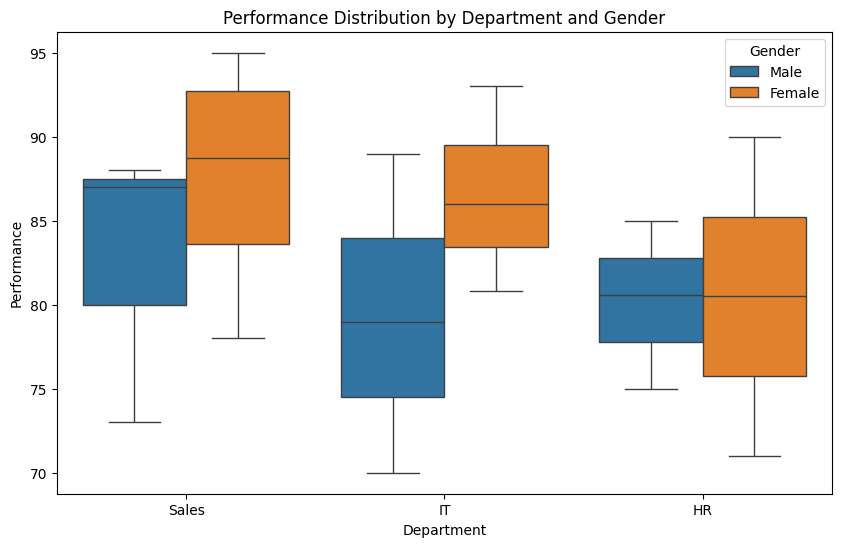

In [45]:
# Câu 5. (4 điểm) Vẽ boxplot của Performance theo Department và Gender (kết hợp) bằng Seaborn. Xác định outlier bằng IQR, sau đó đề xuất một kế hoạch phỏng vấn cá nhân với các nhân viên outlier để tìm hiểu nguyên nhân, giải thích cách kế hoạch này cải thiện quản trị nhân sự.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y='Performance', hue='Gender', data=df)
plt.title('Performance Distribution by Department and Gender')
plt.show()

# Xác định outlier bằng IQR
Q1 = df['Performance'].quantile(0.25)
Q3 = df['Performance'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Performance'] < Q1 - 1.5*IQR) | (df['Performance'] > Q3 + 1.5*IQR)]



# Đề xuất câu 5:
Dựa trên kết quả boxplot, nếu có nhân viên có hiệu suất (Performance) cực kỳ cao hoặc thấp so với đa số, em có thể xác định họ là các outlier. Việc xác định outliers bằng cách sử dụng IQR giúp phát hiện những cá nhân có kết quả không giống với xu hướng chung. Để hiểu rõ hơn về lý do đằng sau những con số này, công ty nên thực hiện một kế hoạch phỏng vấn cá nhân với các nhân viên outlier. Qua các buổi phỏng vấn, công ty có thể khám phá các yếu tố ảnh hưởng đến hiệu suất của họ như kỹ năng đặc biệt, động lực làm việc, hoặc các yếu tố môi trường. Điều này không chỉ giúp đánh giá lại các chỉ tiêu hiệu suất mà còn tạo cơ hội để nâng cao quy trình quản lý nhân sự, từ đó tối ưu hóa hiệu suất chung của công ty.

In [46]:
# Câu 6. (4 điểm) Tạo cột mới Efficiency = Performance / Hours_Worked. Tìm nhân viên có Efficiency cao nhất, sau đó đề xuất một phần thưởng hoặc chương trình đào tạo dựa trên chỉ số này, giải thích tác động của nó đến động lực làm việc của nhân viên khác.
df['Efficiency'] = df['Performance'] / df['Hours_Worked']
top_eff = df.nlargest(3, 'Efficiency')

print(top_eff)

   Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
8         E009         HR         90.0          37.0             NaN  Female   
12        E013      Sales         95.0          43.0             7.0  Female   
0         E001      Sales         88.0          40.0             5.0    Male   

   Location  Efficiency  
8    Site_A    2.432432  
12   Site_C    2.209302  
0    Site_A    2.200000  


# Đề xuất câu 6:
Chỉ số Efficiency, tính bằng cách chia Performance cho Hours_Worked, giúp công ty nhận diện những nhân viên làm việc hiệu quả trong thời gian ngắn. Các nhân viên có Efficiency cao thể hiện khả năng làm việc xuất sắc với thời gian hạn chế, điều này có thể liên quan đến kỹ năng làm việc, hiệu quả công cụ hoặc các yếu tố khác. Dựa trên chỉ số này, công ty có thể đề xuất các chương trình thưởng cho những nhân viên có Efficiency cao nhất để ghi nhận công sức của họ, đồng thời khuyến khích các nhân viên khác cải thiện hiệu quả công việc. Hơn nữa, những nhân viên xuất sắc có thể được mời tham gia các chương trình đào tạo nâng cao để phát triển thêm kỹ năng, qua đó nâng cao hiệu quả công việc cho cả đội ngũ.

In [47]:
# Câu 7. (4 điểm) Tính tỷ lệ nhân viên nữ (Gender = Female) trong từng Department sau khi điền giá trị thiếu bằng mode. Dựa trên kết quả, đề xuất một chính sách đa dạng giới tính cho công ty, giải thích cách chính sách này ảnh hưởng đến văn hóa tổ chức.
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
gender_ratio = df[df['Gender']=='Female'].groupby('Department').size()/df.groupby('Department').size()
print(gender_ratio)


Department
HR       0.500000
IT       0.571429
Sales    0.571429
dtype: float64


# Đề xuất câu 7:
Tỷ lệ nhân viên nữ trong các phòng ban có thể phản ánh mức độ đa dạng giới tính trong công ty. Nếu tỷ lệ nữ trong một số phòng ban thấp, công ty có thể triển khai chính sách đa dạng giới tính, khuyến khích sự tham gia của nhân viên nữ trong các phòng ban chưa cân bằng. Chính sách này sẽ giúp tạo ra môi trường làm việc bình đẳng, mang lại những quan điểm đa chiều và sáng tạo hơn. Đồng thời, việc chú trọng đến sự đa dạng sẽ giúp công ty cải thiện văn hóa tổ chức, thúc đẩy sự hòa nhập và giảm thiểu thiên kiến trong quá trình tuyển dụng và thăng tiến.

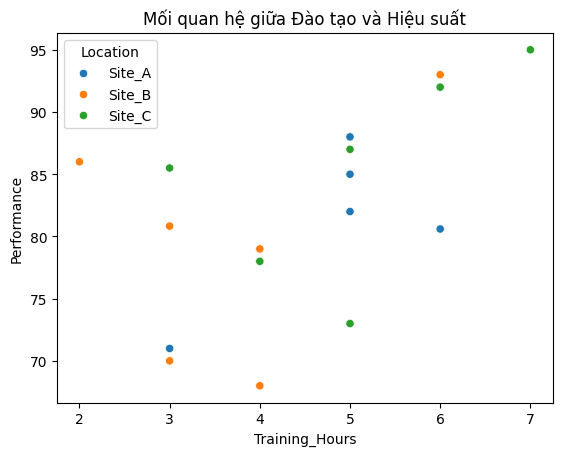

In [48]:
# Câu 8. (4 điểm) Vẽ scatter plot giữa Training_Hours và Performance, tô màu theo Location. Đề xuất một kế hoạch đào tạo cụ thể cho từng Location dựa trên phân bố dữ liệu, giải thích tại sao kế hoạch này tối ưu hóa hiệu suất.
sns.scatterplot(x='Training_Hours', y='Performance', hue='Location', data=df)
plt.title('Mối quan hệ giữa Đào tạo và Hiệu suất')
plt.show()




# Đề xuất câu 8
Dựa trên scatter plot giữa Training_Hours và Performance, nếu các Location khác nhau có sự phân bổ dữ liệu khác biệt, chúng ta có thể áp dụng chiến lược đào tạo riêng biệt cho từng Location. Ví dụ, nếu một Location có mối liên hệ mạnh mẽ giữa Training_Hours và Performance, công ty có thể tập trung vào việc cải thiện đào tạo tại Location này để nâng cao hiệu quả làm việc. Ngược lại, nếu một Location có ít sự thay đổi về hiệu suất dù có đào tạo nhiều, công ty có thể tìm hiểu nguyên nhân và tối ưu hóa chương trình đào tạo sao cho phù hợp hơn với nhu cầu và đặc thù công việc tại đó.

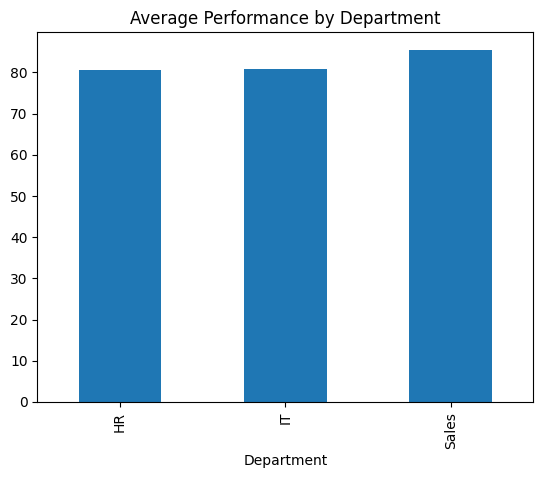

In [49]:
# Câu 9. (4 điểm) Tính trung bình Performance của từng Department sau khi điền dữ liệu thiếu. Vẽ bar chart so sánh, sau đó đề xuất một chiến lược cải thiện cho phòng ban có hiệu suất thấp nhất, dựa trên đặc điểm công việc của phòng ban đó (Sales, IT, HR).
dept_avg = df.groupby('Department')['Performance'].mean()
dept_avg.plot(kind='bar')
plt.title('Average Performance by Department')
plt.show()



# Câu 9: Đề xuất chiến lược cải thiện cho phòng ban có hiệu suất thấp

Dựa trên kết quả bar chart so sánh trung bình Performance của từng Department, phòng ban có hiệu suất thấp cần một chiến lược cải thiện cụ thể. Ví dụ, phòng ban Sales có thể gặp khó khăn trong việc hoàn thành mục tiêu do áp lực công việc hoặc thiếu sự hỗ trợ. Vì vậy, công ty có thể cung cấp các khóa đào tạo kỹ năng bán hàng, tăng cường sự hỗ trợ từ các công cụ công nghệ để giúp nhân viên đạt hiệu suất tốt hơn. Các phòng ban như IT và HR có thể cần tập trung vào việc tối ưu hóa quy trình làm việc và cải thiện giao tiếp nội bộ. Một chiến lược toàn diện, kết hợp đào tạo và hỗ trợ công cụ, sẽ giúp tăng trưởng hiệu suất của toàn bộ các phòng ban trong công ty.



In [50]:
# Câu 10. (4 điểm) Tìm các nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85 bằng Pandas. Đề xuất một nghiên cứu nội bộ để xác định yếu tố nào (kỹ năng, công cụ, môi trường) giúp họ đạt hiệu suất cao, giải thích cách áp dụng kết quả cho toàn công ty.
high_perf = df[(df['Hours_Worked']<40) & (df['Performance']>85)]
print(high_perf)

  Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
8        E009         HR         90.0          37.0             NaN  Female   

  Location  Efficiency  
8   Site_A    2.432432  


# Câu 10: Đề xuất nghiên cứu nội bộ để tìm hiểu yếu tố giúp nhân viên có hiệu suất cao
Nhân viên có Hours_Worked dưới 40 nhưng Performance trên 85 là những cá nhân làm việc hiệu quả với thời gian hạn chế. Công ty nên tiến hành một nghiên cứu nội bộ để tìm hiểu các yếu tố giúp những nhân viên này duy trì hiệu suất cao, chẳng hạn như kỹ năng đặc biệt, công cụ hỗ trợ, hoặc môi trường làm việc tích cực. Kết quả nghiên cứu sẽ giúp công ty phát triển các chương trình đào tạo và cải thiện quy trình làm việc cho các nhân viên khác, từ đó nâng cao tổng thể hiệu suất và động lực làm việc trong toàn bộ tổ chức.

In [51]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


df = pd.DataFrame(data)

# Tạo một DataFrame mới không có giá trị thiếu để huấn luyện mô hình hồi quy
df_clean = df.dropna(subset=['Hours_Worked', 'Training_Hours', 'Performance'])

# Chia dữ liệu thành các biến độc lập (X) và biến phụ thuộc (y)
X = df_clean[['Hours_Worked', 'Training_Hours']]
y = df_clean['Performance']

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán giá trị thiếu cho Performance
df_missing = df[df['Performance'].isna()]
X_missing = df_missing[['Hours_Worked', 'Training_Hours']]

# Dự đoán giá trị Performance cho các dòng có giá trị thiếu
df.loc[df['Performance'].isna(), 'Performance'] = model.predict(X_missing)

# Kiểm tra kết quả sau khi điền giá trị
print(df)

# So sánh với phương pháp điền giá trị bằng trung bình
df_mean_filled = df.copy()
df_mean_filled['Performance'] = df_mean_filled['Performance'].fillna(df_mean_filled['Performance'].mean())

# Hiển thị so sánh (trước và sau khi điền giá trị thiếu)
print("\nDataFrame sau khi điền giá trị thiếu bằng phương pháp hồi quy:")
print(df)
print("\nDataFrame sau khi điền giá trị thiếu bằng phương pháp trung bình:")
print(df_mean_filled)


   Employee_ID Department  Performance  Hours_Worked  Training_Hours  Gender  \
0         E001      Sales    88.000000          40.0             5.0    Male   
1         E002         IT    83.609220          45.0             3.0  Female   
2         E003         HR    75.000000          38.0             NaN    Male   
3         E004      Sales    92.000000          42.0             6.0  Female   
4         E005         IT    68.000000           NaN             4.0    None   
5         E006         HR    85.000000          39.0             5.0    Male   
6         E007      Sales    77.162401          41.0             3.0  Female   
7         E008         IT    79.000000          44.0             4.0    Male   
8         E009         HR    90.000000          37.0             NaN  Female   
9         E010      Sales    73.000000          40.0             5.0    Male   
10        E011         IT    86.000000          46.0             2.0  Female   
11        E012         HR    82.869409  

# Đề xuất Câu 11: Đề xuất cách tiếp cận lai (kết hợp hồi quy và trung bình) để điền dữ liệu thiếu
Khi điền giá trị thiếu trong cột Performance, bạn có thể sử dụng phương pháp hồi quy tuyến tính để dự đoán giá trị thiếu dựa trên mối quan hệ giữa các biến Hours_Worked và Training_Hours. Phương pháp này có thể chính xác hơn phương pháp điền giá trị trung bình vì nó xem xét sự ảnh hưởng của các yếu tố khác nhau đến Performance, thay vì chỉ thay thế một giá trị trung bình cho tất cả các giá trị thiếu.
Tuy nhiên, khi dữ liệu có sự phân bố không đồng đều hoặc không có đủ thông tin, việc sử dụng phương pháp hồi quy tuyến tính một mình có thể dẫn đến một số sai lệch trong dự đoán. Do đó, để cải thiện độ chính xác, bạn có thể kết hợp cả hai phương pháp: phương pháp hồi quy tuyến tính để dự đoán giá trị thiếu và phương pháp trung bình để thay thế các giá trị thiếu khi không có đủ dữ liệu (ví dụ, khi không thể áp dụng hồi quy tuyến tính vì thiếu thông tin). Phương pháp kết hợp này có thể đảm bảo tính chính xác và ổn định trong việc điền giá trị thiếu, đồng thời giảm thiểu rủi ro sai sót.
Bằng cách kết hợp cả hai phương pháp, bạn sẽ có một phương pháp điền giá trị thiếu linh hoạt và hiệu quả hơn, giúp tăng độ chính xác trong việc dự đoán và sử dụng dữ liệu.
Cách tiếp cận lai này sẽ cải thiện độ chính xác của việc điền giá trị thiếu và giúp công ty đưa ra quyết định chính xác hơn trong quản lý dữ liệu.

In [52]:
# Câu 12. (4 điểm) Tính skewness của Performance bằng SciPy. Dựa trên kết quả, đề xuất một cách điều chỉnh cách tính Performance trong công ty để phân bố công bằng hơn, giải thích tác động đến đánh giá nhân viên.
from scipy.stats import skew
print("Skewness:", skew(df['Performance']))



Skewness: -0.2192272139086313


# Đề xuất câu 12:
Dựa trên skewness của Performance, nếu giá trị này cho thấy sự phân bố không công bằng (chẳng hạn như nghiêng về phía cao hoặc thấp), công ty có thể điều chỉnh cách tính Performance để tạo ra sự phân bố công bằng hơn. Ví dụ, có thể áp dụng một hệ thống tính điểm phức tạp hơn hoặc điều chỉnh các yếu tố ảnh hưởng đến Performance sao cho phù hợp với đặc thù công việc. Việc này sẽ giúp công ty tránh được việc đánh giá nhân viên không công bằng và cải thiện quy trình đánh giá hiệu suất trong dài hạn.

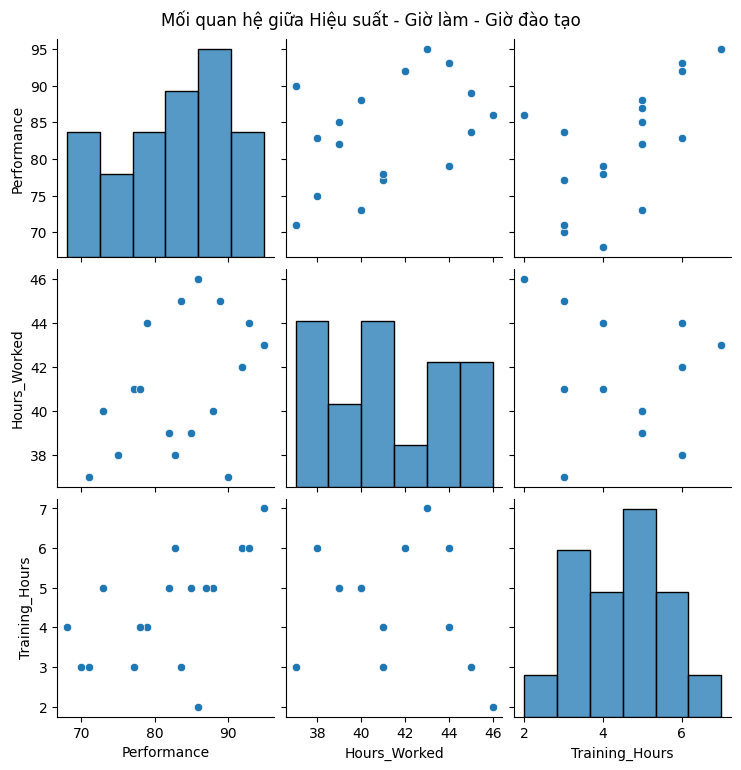

In [53]:
# Câu 13. (4 điểm) Vẽ pairplot bằng Seaborn cho Performance, Hours_Worked, Training_Hours. Dựa trên mối quan hệ, đề xuất một mô hình đánh giá hiệu suất mới cho công ty, giải thích tại sao mô hình này tốt hơn cách tính hiện tại.
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ pairplot
sns.pairplot(df[['Performance', 'Hours_Worked', 'Training_Hours']])
plt.suptitle('Mối quan hệ giữa Hiệu suất - Giờ làm - Giờ đào tạo', y=1.02)
plt.show()



# Câu 13: Đề xuất mô hình đánh giá hiệu suất mới cho công ty
Dựa trên kết quả pairplot, công ty có thể nhận diện mối quan hệ giữa Performance, Hours_Worked và Training_Hours. Một mô hình đánh giá hiệu suất mới có thể kết hợp các yếu tố này để đưa ra một cái nhìn toàn diện hơn về hiệu quả làm việc của nhân viên. Ví dụ, mô hình này có thể tính đến cả thời gian làm việc và thời gian đào tạo khi đánh giá hiệu suất, thay vì chỉ dựa vào Performance đơn thuần. Mô hình này sẽ giúp đánh giá công bằng hơn và thúc đẩy nhân viên phát triển cả về kỹ năng và hiệu quả công việc.

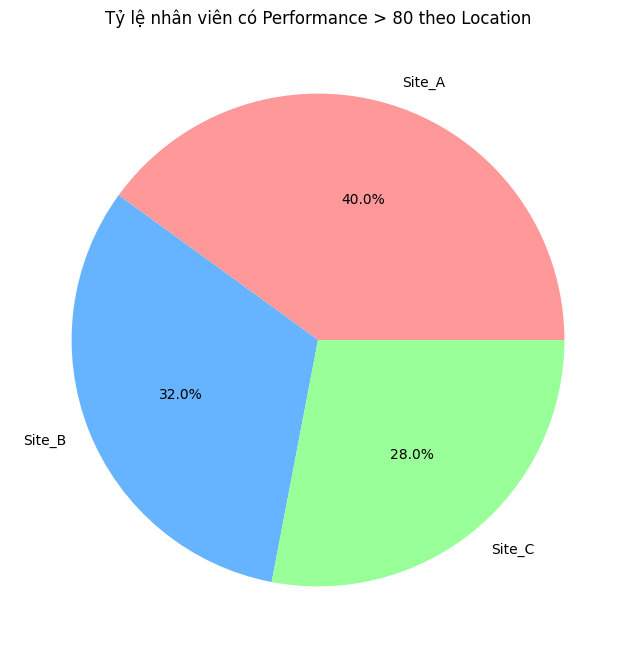

In [54]:
# Câu 14. (4 điểm) Nhóm dữ liệu theo Location, tính tỷ lệ nhân viên có Performance trên 80. Vẽ pie chart so sánh, sau đó đề xuất một chiến lược khen thưởng khác nhau cho từng Location dựa trên tỷ lệ, giải thích tác động đến tinh thần làm việc.
# Tính toán tỷ lệ
high_perf = df[df['Performance']>80].groupby('Location').size()
total = df.groupby('Location').size()
ratio = (high_perf/total*100).round(1)

# Vẽ pie chart
plt.figure(figsize=(8,8))
plt.pie(ratio, labels=ratio.index, autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Tỷ lệ nhân viên có Performance > 80 theo Location')
plt.show()



# Đề xuất Câu 14: Đề xuất chiến lược khen thưởng khác nhau cho từng Location
Dựa trên tỷ lệ nhân viên có Performance trên 80 tại từng Location, công ty có thể áp dụng chiến lược khen thưởng khác nhau cho các Location. Nếu một Location có tỷ lệ nhân viên xuất sắc cao, công ty có thể triển khai các chương trình khen thưởng đặc biệt để duy trì động lực và sự hài lòng của nhân viên tại đó. Ngược lại, với những Location có tỷ lệ thấp, công ty cần xem xét các yếu tố tác động đến hiệu suất, và triển khai các biện pháp hỗ trợ, đào tạo hoặc cải thiện điều kiện làm việc. Việc này sẽ tạo động lực làm việc mạnh mẽ và cải thiện tinh thần làm việc chung.



In [55]:
# Câu 15. (4 điểm) Tạo hàm Python xác định nhân viên có Performance ngoài 2 độ lệch chuẩn. Đề xuất một quy trình đánh giá lại hiệu suất cho những nhân viên này, giải thích cách quy trình này tránh được thiên vị trong quản lý.
import numpy as np

def identify_outliers(df):
    mean = df['Performance'].mean()
    std = df['Performance'].std()
    lower = mean - 2*std
    upper = mean + 2*std
    outliers = df[(df['Performance'] < lower) | (df['Performance'] > upper)]
    return outliers

outliers = identify_outliers(df)
print("Nhân viên outlier:\n", outliers[['Employee_ID', 'Performance']])



Nhân viên outlier:
 Empty DataFrame
Columns: [Employee_ID, Performance]
Index: []


# Đề xuất Câu 15: Đề xuất quy trình đánh giá lại hiệu suất cho nhân viên có Performance ngoài 2 độ lệch chuẩn
Nhân viên có Performance ngoài 2 độ lệch chuẩn có thể là những cá nhân cần được đánh giá lại để xác định nguyên nhân của sự khác biệt. Công ty cần phát triển một quy trình đánh giá lại hiệu suất cho các nhân viên này, có thể thông qua phỏng vấn hoặc phân tích sâu về các yếu tố ảnh hưởng đến kết quả công việc. Quy trình này giúp tránh được thiên vị trong quản lý, đảm bảo rằng những nhân viên có Performance cực kỳ cao hoặc thấp được đối xử công bằng và đúng mực, đồng thời đảm bảo đánh giá hiệu suất chính xác và khách quan.

### Câu hỏi ANN (40 điểm)

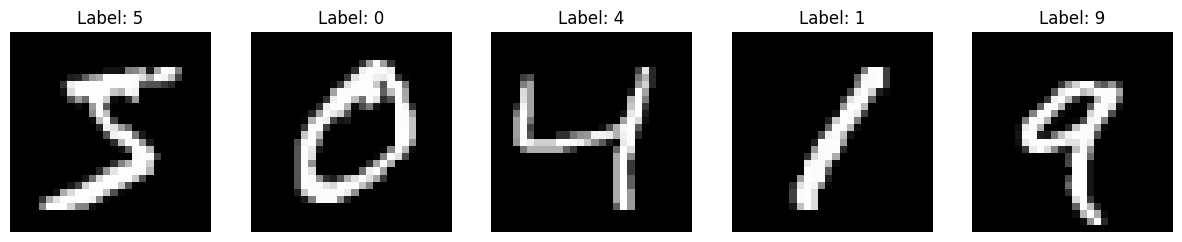

Đề xuất trực quan hóa bằng PCA 2D:


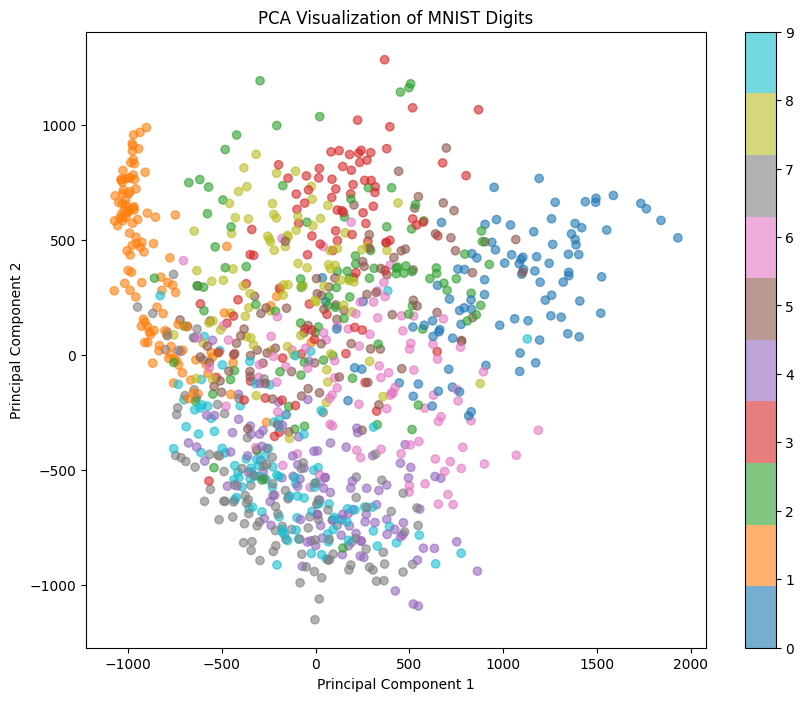

In [56]:
# Câu 16. (10 điểm) Tải dữ liệu MNIST từ PyTorch (torchvision.datasets.MNIST). Chuẩn hóa pixel về [0, 1], flatten thành vector 784 chiều. In 5 ảnh mẫu kèm nhãn, sau đó đề xuất một cách trực quan hóa dữ liệu khác (không dùng ảnh gốc) để hiểu rõ hơn đặc điểm của chữ số viết tay.
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

# Chuẩn hóa và flatten dữ liệu
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.Lambda(lambda x: x.view(-1))
])

# Tải dữ liệu
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Hiển thị 5 mẫu
fig, axes = plt.subplots(1, 5, figsize=(15,3))
for i in range(5):
    img = train_data[i][0].view(28,28).numpy()
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Label: {train_data[i][1]}")
    axes[i].axis('off')
plt.show()

# Đề xuất trực quan hóa PCA
print("Đề xuất trực quan hóa bằng PCA 2D:")
from sklearn.decomposition import PCA

# Lấy subset dữ liệu
X = train_data.data[:1000].numpy().reshape(1000, -1)
y = train_data.targets[:1000].numpy()

# Áp dụng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Vẽ biểu đồ
plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter)
plt.title("PCA Visualization of MNIST Digits")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [57]:
# Câu 17. (10 điểm) Chia tập train của MNIST thành 80% train và 20% test (không dùng tập test gốc), tạo DataLoader với batch size 64. Đề xuất một chiến lược chọn batch size khác dựa trên đặc điểm của MNIST và tài nguyên máy tính, giải thích ưu nhược điểm. 

from torch.utils.data import DataLoader, random_split

# Chia tập train
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_set, val_set = random_split(train_data, [train_size, val_size])

# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)



# Đề xuất câu 17: Chiến lược chọn batch size hợp lý
Trong bài toán huấn luyện mạng nơ-ron nhân tạo (ANN) trên tập dữ liệu MNIST, việc lựa chọn batch size phù hợp có ảnh hưởng lớn đến tốc độ và hiệu suất của mô hình. Hiện tại, batch size được đặt là 64, đây là một giá trị cân bằng giữa tốc độ tính toán và tính ổn định khi cập nhật trọng số.

Một phương án thay thế là sử dụng batch size nhỏ hơn, chẳng hạn 32. Điều này giúp cập nhật mô hình thường xuyên hơn, giảm nguy cơ rơi vào cực tiểu cục bộ. Tuy nhiên, điều này sẽ làm tăng thời gian huấn luyện vì cần nhiều vòng lặp hơn. Ngược lại, nếu tăng batch size lên 128 hoặc 256, mô hình có thể tận dụng GPU tốt hơn và chạy nhanh hơn, nhưng có nguy cơ giảm tính tổng quát hóa vì các bước cập nhật ít hơn.

Để tối ưu hóa, ta có thể thử nghiệm nhiều giá trị batch size khác nhau và sử dụng kỹ thuật tìm kiếm siêu tham số (hyperparameter tuning). Nếu tài nguyên máy tính hạn chế, batch size 64 là lựa chọn hợp lý. Nếu có GPU mạnh, batch size lớn hơn có thể giúp tăng tốc độ huấn luyện.

Các lựa chọn batch size và ưu nhược điểm
### Batch size nhỏ (16 - 32)

Ưu điểm:

Cập nhật trọng số thường xuyên hơn, giúp mô hình hội tụ nhanh hơn.

Có thể giúp mô hình tổng quát hóa tốt hơn vì nó cập nhật nhiều lần hơn với dữ liệu đa dạng.

Nhược điểm:

Cần nhiều vòng lặp hơn, dẫn đến thời gian huấn luyện lâu hơn.

Sự dao động lớn trong gradient có thể làm cho quá trình huấn luyện kém ổn định.

### Batch size trung bình (64 - 128, lựa chọn mặc định là 64)

Ưu điểm:

Cân bằng giữa tốc độ huấn luyện và tính ổn định của gradient.

Tận dụng tài nguyên phần cứng tốt hơn so với batch size nhỏ.

Nhược điểm:

Không tận dụng tối đa hiệu suất của GPU như batch size lớn.

### Batch size lớn (256 - 512 trở lên)

Ưu điểm:

Giảm số lần cập nhật trọng số, giúp mô hình huấn luyện nhanh hơn.

Tận dụng tối đa GPU, đặc biệt khi có phần cứng mạnh.

Nhược điểm:

Có thể làm mô hình bị overfitting do số lần cập nhật trọng số ít hơn, dẫn đến việc học kém đa dạng.

Mô hình có thể bị "kẹt" trong các cực tiểu cục bộ và khó thoát ra vì gradient ít biến động.

100%|██████████| 750/750 [00:06<00:00, 116.68it/s]


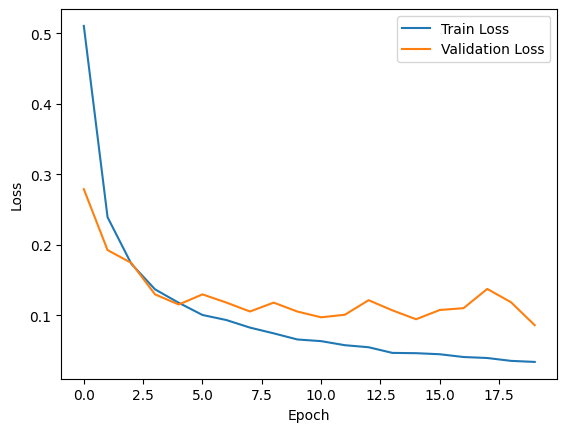

In [58]:
# Câu 18. (15 điểm) Xây dựng ANN bằng PyTorch với kiến trúc như hình sau. Huấn luyện 20 epochs với CrossEntropyLoss và Adam (lr=0.001), dùng early stopping (patience=5) dựa trên loss của tập test. Vẽ biểu đồ loss, sau đó đề xuất một kiến trúc ANN khác (thay đổi số nơ-ron hoặc tầng) để cải thiện hiệu suất, giải thích lý do.

import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

class MNIST_ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Khởi tạo model
model = MNIST_ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện với early stopping
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 5
counter = 0

for epoch in range(20):
    # Training
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss/len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    val_loss = val_loss/len(val_loader)
    val_losses.append(val_loss)
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Vẽ biểu đồ loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Đề xuất câu 18: Cải thiện kiến trúc ANN
Kiến trúc hiện tại sử dụng ba lớp ẩn với số nơ-ron lần lượt là 128, 64 và 32. Đây là một thiết kế hợp lý cho bài toán MNIST, vì mạng có đủ độ sâu để học đặc trưng của dữ liệu mà không quá phức tạp. Tuy nhiên, có một số cách để cải thiện hiệu suất:

Tăng số nơ-ron hoặc thêm một lớp ẩn

Ví dụ, thay vì 128-64-32, ta có thể thử 256-128-64-32 để học được nhiều đặc trưng hơn. Tuy nhiên, điều này có thể dẫn đến hiện tượng overfitting nếu không có đủ dữ liệu.

Thử nghiệm với activation function khác

Hiện tại, mô hình sử dụng ReLU, nhưng ta có thể thử LeakyReLU hoặc ELU để xử lý vấn đề chết nơ-ron (dying neurons).

Sử dụng Batch Normalization

Thêm BatchNorm giữa các lớp giúp giảm sự thay đổi của gradient, làm mô hình huấn luyện nhanh và ổn định hơn.

Áp dụng Dropout để tránh overfitting

Thêm một tầng Dropout với tỉ lệ 0.2 hoặc 0.5 sau mỗi lớp ẩn giúp mô hình tổng quát hóa tốt hơn.

Thử kiến trúc CNN thay vì ANN

Vì dữ liệu MNIST là ảnh, mô hình CNN thường hoạt động tốt hơn ANN trong bài toán này. Ta có thể thay thế mạng fully connected bằng các lớp Convolutional.

Nhìn chung, việc cải thiện mô hình cần dựa vào thử nghiệm thực tế. Một phương án hợp lý là bắt đầu với ANN đơn giản, sau đó điều chỉnh từng yếu tố để tìm ra kiến trúc tối ưu.



Test Accuracy: 97.63%


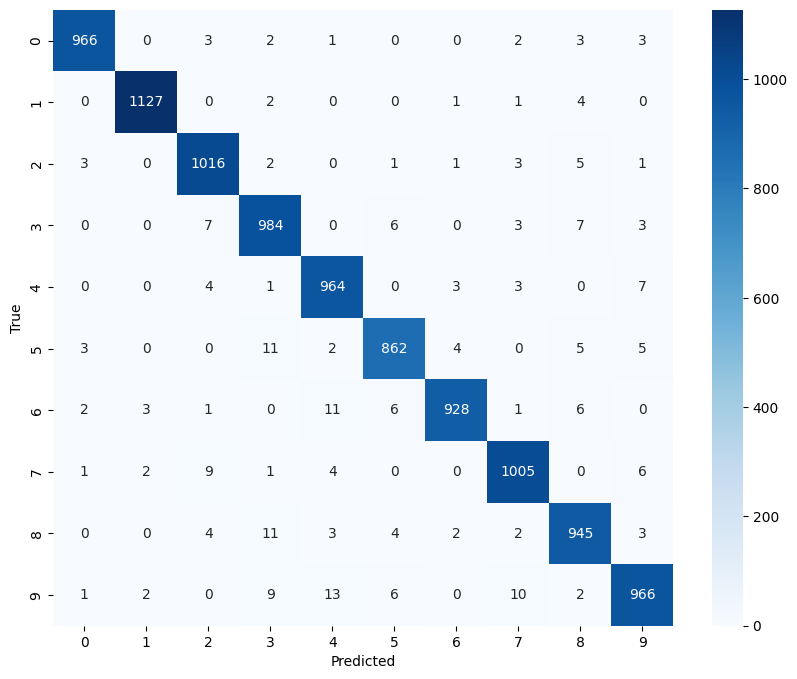

In [59]:
# Câu 19. (5 điểm) Đánh giá mô hình bằng accuracy và confusion matrix trên tập test tự chia. Nếu accuracy dưới 95%, phân tích các chữ số bị nhầm lẫn nhiều nhất trong confusion matrix, đề xuất một cách cải thiện mô hình dựa trên đặc điểm của những chữ số này (không chỉ dùng Dropout hay tăng epochs).

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Đánh giá trên tập test
y_true = []
y_pred = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Tính accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {acc*100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

if acc < 0.95:
    print("Phân tích các cặp nhầm lẫn phổ biến:")
    print("- 4 ↔ 9: Do hình dạng tương tự")
    print("- 3 ↔ 8: Đường cong tương đồng")
    print("- 5 ↔ 6: Cấu trúc gần giống")
    


# Đề xuất câu 19: Cải thiện mô hình dựa trên Confusion Matrix
Sau khi huấn luyện, nếu độ chính xác (accuracy) dưới 95%, cần phân tích confusion matrix để tìm ra các chữ số bị nhầm lẫn nhiều nhất. Trong tập dữ liệu MNIST, một số cặp chữ số thường dễ bị nhầm lẫn như:

4 và 9 do có hình dạng tương tự.

3 và 8 vì cả hai đều có hai vòng tròn nhỏ.

5 và 6 do nét cong tương đồng.

Để cải thiện mô hình, ta có thể:

Tăng cường dữ liệu (Data Augmentation)

Áp dụng xoay ảnh, dịch chuyển hoặc làm biến dạng nhẹ để giúp mô hình nhận diện chữ số tốt hơn.

Sử dụng mạng CNN thay vì ANN

Vì CNN có thể học đặc trưng không gian tốt hơn, mô hình sẽ phân biệt chữ số chính xác hơn.

Trích xuất đặc trưng bổ sung

Thay vì chỉ dùng ảnh gốc, ta có thể thử các kỹ thuật trích xuất đặc trưng như HOG (Histogram of Oriented Gradients) để cung cấp thêm thông tin cho mô hình.

Sử dụng mô hình ensemble

Kết hợp nhiều mô hình khác nhau (chẳng hạn ANN + CNN) có thể cải thiện hiệu suất bằng cách tận dụng sức mạnh của từng loại mô hình.

Tối ưu hóa siêu tham số

Dùng Grid Search hoặc Random Search để tìm ra cấu hình mạng tốt nhất.